Loading & Defining Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("home_tech_protection_data.csv")

# Secondary Device Types
secondary_device_types = [
    "Laptop", "Gaming System", "Smart Headphones", "Desktop", "Smart TV",
    "Smart Thermostat", "Smart Security Camera", "Printer", "Fitness Tracker", 
    "Smart Speaker", "Sound Bar"
]

print(df.columns)  # VERY IMPORTANT: Print column names
print(df.head()) #Print the first few rows to see the values in the columns

df.columns = df.columns.str.strip() #Clean up the names

print(df.dtypes)
print(df.isnull().sum())
df["Secondary Devices Owned"] = df["Secondary Devices Owned"].fillna("None")

Index(['Customer ID', 'Initial Device Inquiry', 'Initial Issue Category',
       'Secondary Devices Owned', 'Probing Question/Statement Used',
       'HomeTech Protection Offer Presented',
       'HomeTech Protection Offer Accepted'],
      dtype='object')
   Customer ID Initial Device Inquiry Initial Issue Category  \
0            0                  Phone       Slow Performance   
1            1            Smart Watch     Connectivity Issue   
2            2                  Phone              App Issue   
3            3                 Tablet         Warranty Claim   
4            4                 Tablet     Connectivity Issue   

                             Secondary Devices Owned  \
0  Laptop, Desktop, Printer, Smart Thermostat, Sm...   
1                                  Smart TV, Desktop   
2  Gaming System, Smart Thermostat, Smart TV, Des...   
3  Smart Security Camera, Smart TV, Desktop, Gami...   
4  Laptop, Smart Thermostat, Smart Security Camer...   

                     

Device Ownership Patterns:
    What are the most common combinations of secondary devices owned?

Most Common Combinations of Secondary Devices Owned (Including None):
Secondary Devices List
(Desktop, Fitness Tracker, Gaming System, Laptop, Printer, Smart Headphones, Smart Security Camera, Smart Speaker, Smart TV, Smart Thermostat, Sound Bar)    174
(None,)                                                                                                                                                      152
(Smart TV,)                                                                                                                                                   24
(Desktop, Gaming System, Laptop, Printer, Smart Headphones, Smart Security Camera, Smart Speaker, Smart TV, Smart Thermostat, Sound Bar)                      22
(Smart Headphones,)                                                                                                                                           18
(Desktop, Fitness Tracker, Gaming System, Laptop, Printer, Smart Headphones, Smart Security Camera, Sm

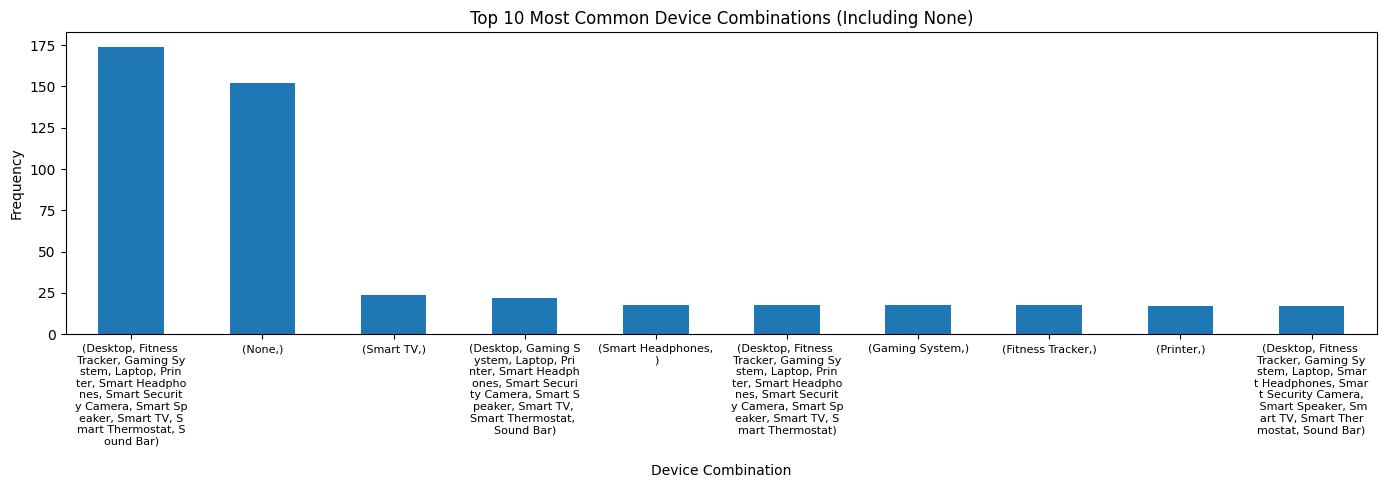

In [7]:
# Convert to list, handling missing values, and then to tuple
def convert_to_list(x):
    if pd.isna(x):  # Check for missing values (NaN)
        return "None" # Treat NaN as "None" string
    elif isinstance(x, str): #Check if it is a string
        return x.split(", ")
    else: #If it is not a string or NaN then it is an unexpected value
        return "None" #Treat it as None as well

df["Secondary Devices List"] = df["Secondary Devices Owned"].apply(convert_to_list)

device_combinations = df["Secondary Devices List"].apply(lambda x: tuple(sorted(x)) if isinstance(x, list) and x else "None").value_counts()

# Get the top N most common combinations (including None)
top_n = 10
most_common_combinations = device_combinations.head(top_n)

print("Most Common Combinations of Secondary Devices Owned (Including None):")
print(most_common_combinations)

# Visualize the most common combinations (including None)
plt.figure(figsize=(14, 6))  # Slightly wider figure
ax = most_common_combinations.plot(kind="bar")

plt.title(f"Top {top_n} Most Common Device Combinations (Including None)")
plt.xlabel("Device Combination")
plt.ylabel("Frequency")

# Improved label wrapping with smaller font and spacing
def wrap_labels(ax, width, height, fontsize=8):  # Added fontsize parameter
    labels = [item.get_text() for item in ax.get_xticklabels()]
    wrapped_labels = []
    for label in labels:
        new_label = ""
        for i in range(0, len(label), width):
            new_label += label[i:i+width] + "\n"
        wrapped_labels.append(new_label)

    ax.set_xticklabels(wrapped_labels, rotation=0, fontsize=fontsize)  # Set fontsize

    # Adjust layout with more space at the bottom
    plt.tight_layout(rect=[0, 0.15, 1, 0.98])  # Increased bottom space


wrap_labels(ax, 18, 10, fontsize=8)  # Adjust width, height, and fontsize as needed

plt.show()

Observation: The most common customer device ownership patterns reveal two dominant groups: a large segment (174 customers) owns all listed secondary devices (desktops, laptops, gaming systems, smart home devices, etc.), and a similarly sized group (152 customers) owns none.  Smaller segments own various partial combinations, with "Smart TV" alone being the most frequent single device owned (24 customers).  This bimodal distribution suggests distinct customer profiles, one highly invested in technology and the other with minimal secondary device ownership, highlighting opportunities for targeted marketing and product bundling.

Device Ownership Patterns:
        Are there any correlations between the initial device inquiry and the types of secondary devices owned?


Correlation between Initial Device Inquiry and Secondary Devices Owned:
                                       InitialDevice_Phone  \
InitialDevice_Phone                               1.000000   
InitialDevice_Smart Watch                        -0.481723   
InitialDevice_Tablet                             -0.493609   
Secondary_Laptop_Owned                           -0.013624   
Secondary_Gaming System_Owned                     0.004731   
Secondary_Smart Headphones_Owned                 -0.013186   
Secondary_Desktop_Owned                           0.010811   
Secondary_Smart TV_Owned                          0.006909   
Secondary_Smart Thermostat_Owned                 -0.012812   
Secondary_Smart Security Camera_Owned             0.032636   
Secondary_Printer_Owned                           0.024814   
Secondary_Fitness Tracker_Owned                   0.020772   
Secondary_Smart Speaker_Owned                     0.015231   
Secondary_Sound Bar_Owned                        -0.005958 

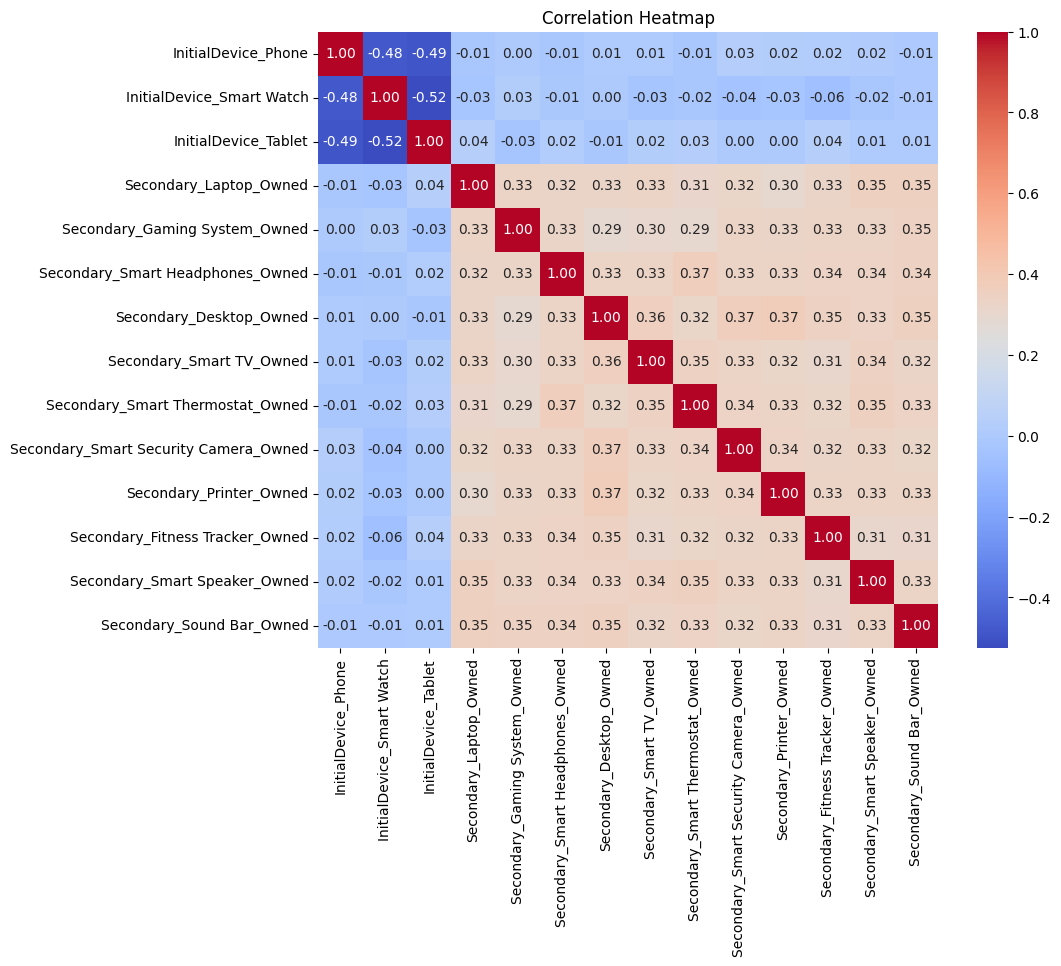


Correlation between Initial Device Inquiry (Phone) and Secondary Devices Owned:
Secondary_Laptop_Owned                  -0.013624
Secondary_Gaming System_Owned            0.004731
Secondary_Smart Headphones_Owned        -0.013186
Secondary_Desktop_Owned                  0.010811
Secondary_Smart TV_Owned                 0.006909
Secondary_Smart Thermostat_Owned        -0.012812
Secondary_Smart Security Camera_Owned    0.032636
Secondary_Printer_Owned                  0.024814
Secondary_Fitness Tracker_Owned          0.020772
Secondary_Smart Speaker_Owned            0.015231
Secondary_Sound Bar_Owned               -0.005958
Name: InitialDevice_Phone, dtype: float64


In [8]:
# Create dummy variables for initial device inquiry
initial_device_dummies = pd.get_dummies(df["Initial Device Inquiry"], prefix="InitialDevice")
df = pd.concat([df, initial_device_dummies], axis=1)

# Create a function to check if a device is in the secondary device string
def device_owned(row, device):
    if pd.isna(row["Secondary Devices Owned"]): #Handle NaN
        return False
    elif row["Secondary Devices Owned"] == "None":
        return False
    return device in row["Secondary Devices Owned"]

# Create boolean columns for each secondary device
for device in secondary_device_types:  # Now secondary_device_types is defined!
    df[f"Secondary_{device}_Owned"] = df.apply(lambda row: device_owned(row, device), axis=1)

# Calculate the correlation between initial device and secondary device ownership
correlation_matrix = df[[col for col in df if col.startswith("InitialDevice")] + [col for col in df if col.startswith("Secondary_")]].corr()

print("\nCorrelation between Initial Device Inquiry and Secondary Devices Owned:")
print(correlation_matrix)

# Visualize the correlation matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example specific correlation (Optional but helpful)
print("\nCorrelation between Initial Device Inquiry (Phone) and Secondary Devices Owned:")
print(correlation_matrix.loc['InitialDevice_Phone', [col for col in df if col.startswith("Secondary_")]])

Observation: The correlation matrix reveals weak relationships between a customer's initial device inquiry (phone, smart watch, or tablet) and their ownership of secondary devices (laptops, gaming systems, smart home devices, etc.).  Correlations between initial inquiry and secondary device ownership are generally close to zero, suggesting no strong linear relationship.  However, moderate to strong positive correlations exist among the secondary devices themselves, indicating that customers who own one type of secondary device are more likely to own others.  This suggests that while the initial inquiry is not a good predictor of secondary device ownership, there is a tendency for customers to accumulate multiple secondary devices.

Probing Question Effectiveness: 
	What is the overall acceptance rate for HomeTech Protection?

Using acceptance column: HomeTech Protection Offer Accepted
Overall Offer Acceptance Rate for HomeTech Protection: 14.90%


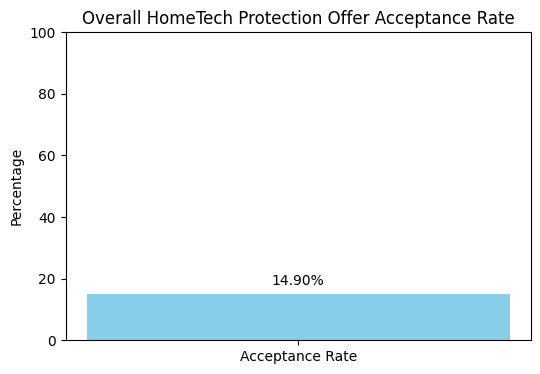

In [9]:
# Calculate the overall offer acceptance rate

# 1. Dynamically determine the acceptance column name
potential_acceptance_columns = ["HomeTech Protection Offer Accepted",  # Add other potential acceptance columns
                                 "Protection Offer Accepted",
                                 "Offer Accepted"]  # Example

acceptance_column = None
for col in potential_acceptance_columns:
    if col in df.columns:
        acceptance_column = col
        break

if acceptance_column is None:
    raise ValueError("No acceptance column found. Check your data.")

print(f"Using acceptance column: {acceptance_column}")

# 2. Calculate acceptance rate (for True values)
accepted_offers = df[acceptance_column].sum()  # True is treated as 1, False as 0

total_offers = len(df) # Total number of customers who were offered the protection

if total_offers == 0:
    acceptance_rate = 0  # Avoid division by zero
else:
    acceptance_rate = (accepted_offers / total_offers) * 100

print(f"Overall Offer Acceptance Rate for HomeTech Protection: {acceptance_rate:.2f}%")

# 3. Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Acceptance Rate'], [acceptance_rate], color='skyblue')
plt.title('Overall HomeTech Protection Offer Acceptance Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.text(0, acceptance_rate + 2, f'{acceptance_rate:.2f}%', ha='center', va='bottom')
plt.show()

Observation: The overall acceptance rate for HomeTech Protection offers is 14.90%, meaning that approximately 15 out of every 100 customers offered the protection choose to accept it.

Probing Question Effectiveness: 
	How do conversion rates vary depending on the probing question used?

Acceptance Rates by Probing Question/Statement:
- Bundle Smart TVs with other devices for complete home tech protection. It's very affordable. Would you like to explore that option?: 17.60%
- Protecting your Smart TV can be expensive. HomeTech Protection offers great coverage for entertainment devices. Interested?: 16.17%
- I see you have a laptop and a gaming system. HomeTech Protection covers all your devices, even high-value ones like those. Would you be interested in learning more?: 11.70%
- With a laptop and a gaming system, you've got a great setup. HomeTech Protection can keep it all protected. Want to learn more?: 11.89%
- It looks like you're into wearable tech! HomeTech Protection can cover both your Smart Watch and Fitness Tracker, and all your other devices too. Want to learn more?: 16.67%
- While we're discussing your {initial_device}, have you considered protecting it against accidental damage?: 20.78%
- I see you have some smart home devices. HomeTech Protection can cove

C:\Users\josep\AppData\Local\Temp\ipykernel_7504\329504432.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


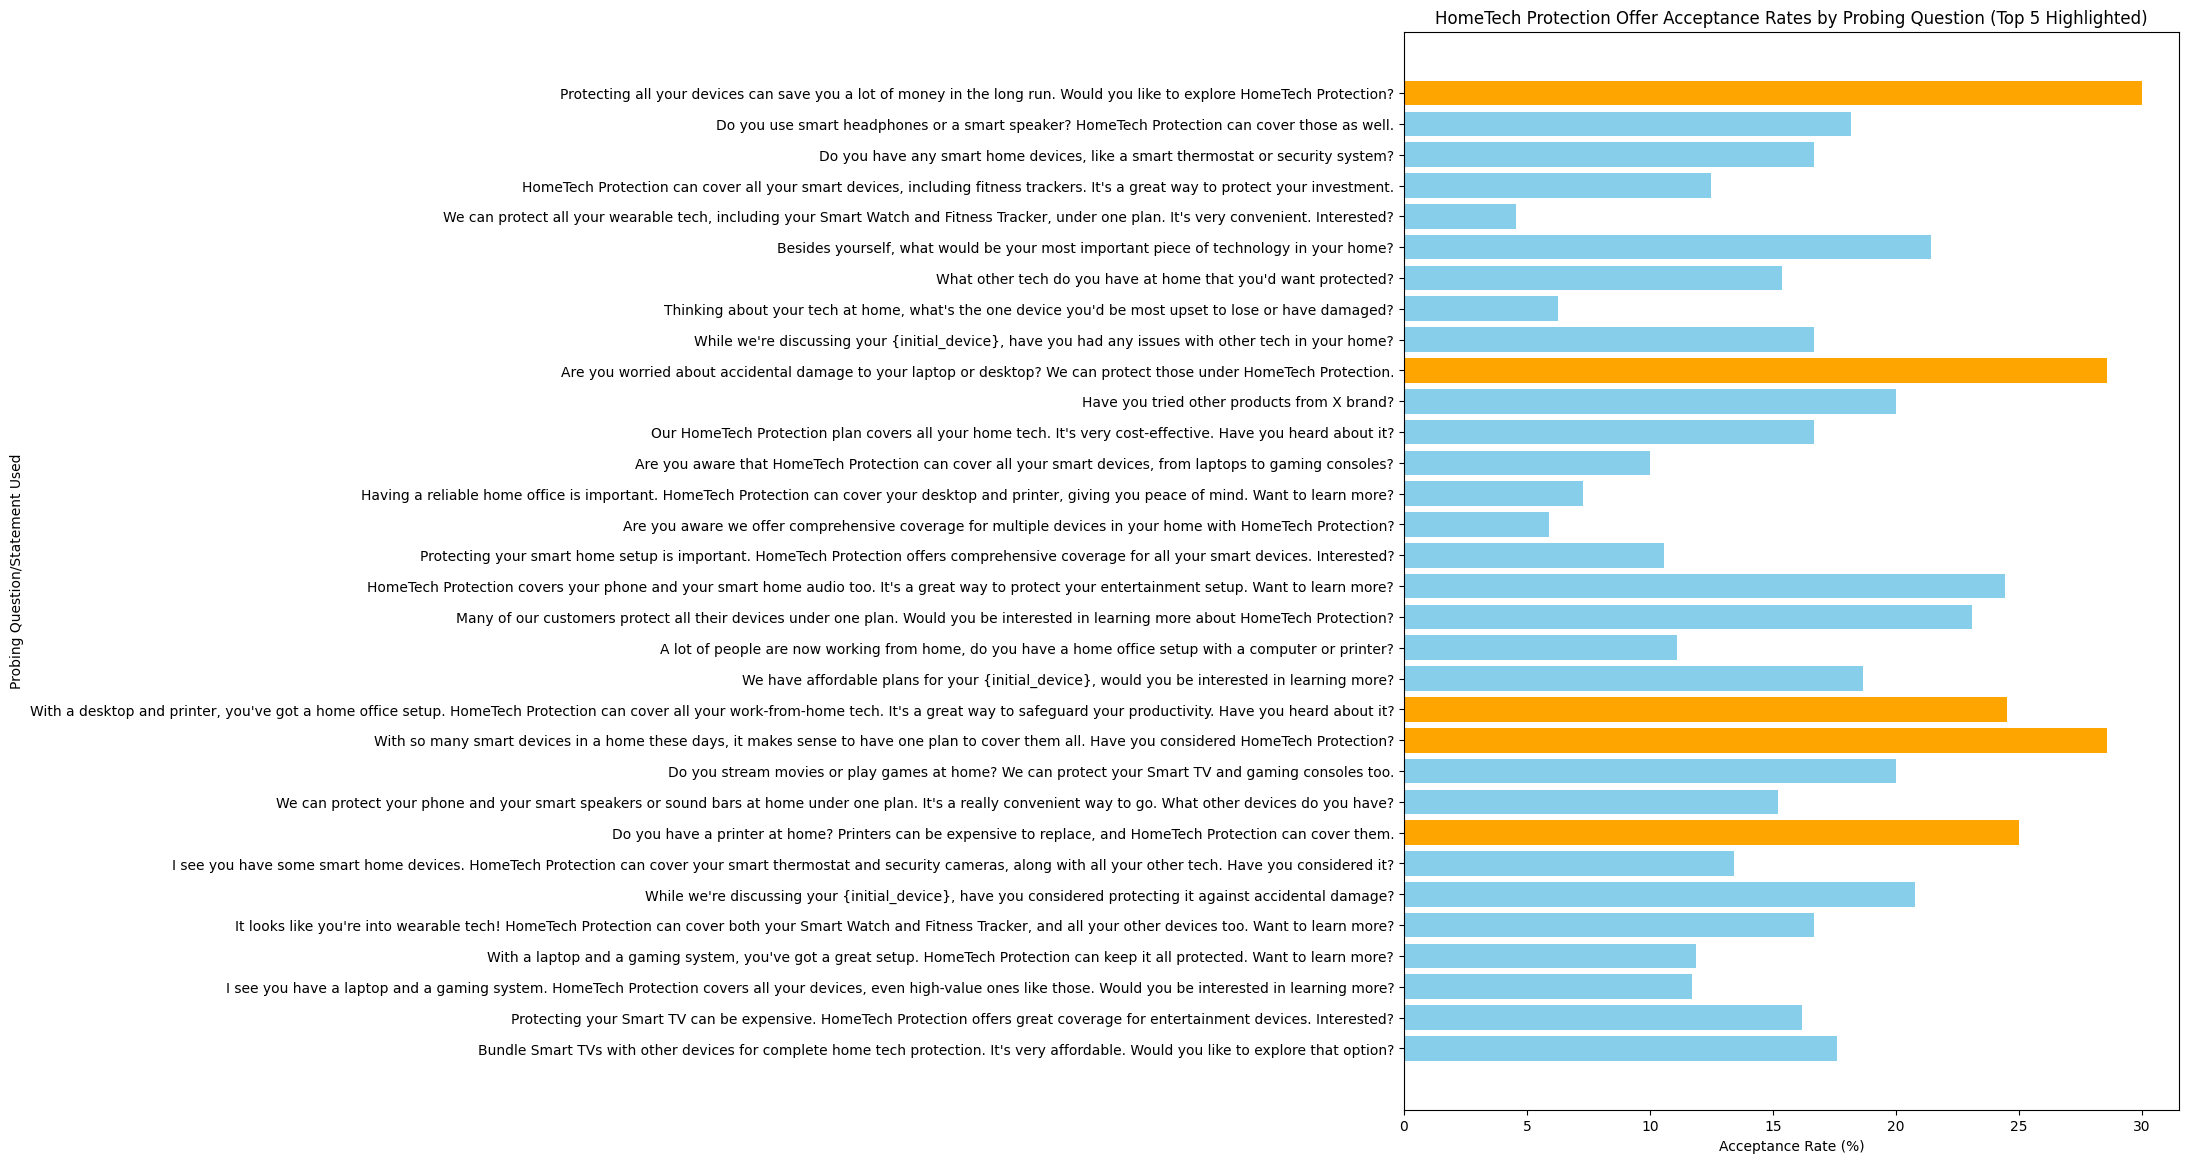

In [12]:
# --- SECTION 5: Acceptance Rates by Probing Question/Statement ---

# 1. Identify the probing question/statement column
probing_question_column = 'Probing Question/Statement Used'  # Replace with the actual column name

if probing_question_column not in df.columns:
    raise ValueError(f"Probing question/statement column '{probing_question_column}' not found. Check your data.")

# 2. Calculate acceptance rates for each probing question/statement
acceptance_rates_by_question = {}

for question in df[probing_question_column].unique():
    subset = df[df[probing_question_column] == question]

    # Dynamically determine the acceptance column name
    potential_acceptance_columns = ["HomeTech Protection Offer Accepted",  # Add other potential acceptance columns
                                     "Protection Offer Accepted",
                                     "Offer Accepted"]  # Example

    acceptance_column = None
    for col in potential_acceptance_columns:
        if col in subset.columns:  # Check in the subset!
            acceptance_column = col
            break

    if acceptance_column is None:
        raise ValueError("No acceptance column found. Check your data.")

    accepted_offers = subset[acceptance_column].sum()
    total_offers = len(subset)

    if total_offers == 0:
        acceptance_rate = 0
    else:
        acceptance_rate = (accepted_offers / total_offers) * 100

    acceptance_rates_by_question[question] = acceptance_rate

# 3. Print the results
print("Acceptance Rates by Probing Question/Statement:")
for question, rate in acceptance_rates_by_question.items():
    print(f"- {question}: {rate:.2f}%")

# 4. Visualization (Horizontal Bar chart with highlighted top 5)

plt.figure(figsize=(10, 14))  # Adjust width and height as needed
questions = list(acceptance_rates_by_question.keys())
rates = list(acceptance_rates_by_question.values())

# Sort rates in descending order and get indices of top 5
top_5_indices = sorted(range(len(rates)), key=lambda i: rates[i], reverse=True)[:5]

# Create bar chart with colors based on top 5
colors = ['skyblue'] * len(rates)  # Initialize all bars as skyblue
for i in top_5_indices:
    colors[i] = 'orange'  # Set top 5 bars to orange

plt.barh(questions, rates, color=colors)  # Use the color list

plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Probing Question/Statement Used')  # Use original column name
plt.title('HomeTech Protection Offer Acceptance Rates by Probing Question (Top 5 Highlighted)')
plt.tight_layout()
plt.show()

Observation: HomeTech Protection offer acceptance rates vary significantly depending on the probing question used.  The most effective questions, yielding acceptance rates of 25% or higher, focus on specific customer setups (home offices, multiple devices under one plan) or address potential anxieties about damage.  Questions highlighting affordability or general coverage have moderate success (around 15-20%).  Questions that are too broad ("Are you aware we offer...") or focus on less critical devices (wearables, individual devices) have the lowest acceptance rates (below 10%).  This suggests that targeted probing questions, addressing specific customer needs and pain points, are more likely to result in offer acceptance.